# Assignment 7 - Team 7 

John Gullette, Rebecca Conn, Karyna Todd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('cars_messy.csv')
data.head

<bound method NDFrame.head of                            Car   MPG  Cylinders  Displacement  Horsepower  \
0    Chevrolet Chevelle Malibu  18.0        8.0         307.0       130.0   
1            Buick Skylark 320  15.0        8.0         350.0       165.0   
2           Plymouth Satellite  18.0        8.0         318.0       150.0   
3                AMC Rebel SST  16.0        8.0         304.0       150.0   
4                  Ford Torino  17.0        8.0         302.0       140.0   
..                         ...   ...        ...           ...         ...   
400            Ford Mustang GL  27.0        4.0         140.0        86.0   
401          Volkswagen Pickup  44.0        4.0          97.0        52.0   
402              Dodge Rampage  32.0        4.0         135.0        84.0   
403                Ford Ranger  28.0        4.0         120.0        79.0   
404                 Chevy S-10  31.0        4.0         119.0        82.0   

     Weight  Acceleration  Model   Origin  Do

## 2.1.1 Remove all the leading and trailing spaces in the data

In [3]:
data.columns = data.columns.str.strip()

## 2.1.2 Check if there are duplicates. If so, remove them.

In [4]:
dups = data.duplicated()

if dups.sum() == 0:
    print("There are no duplicates")  
else: 
    print("Number of duplicate rows = %d" % (dups.sum()))
    data = data.drop_duplicates()
    print("Duplicates have been dropped")

Number of duplicate rows = 1
Duplicates have been dropped


## 2.2.1 Display the null/missing values

In [5]:
print('Number of instances = %d\nNumber of attributes = %d' % (data.shape[0], data.shape[1]))
print('------------------------------')
data.isnull().sum()

Number of instances = 404
Number of attributes = 10
------------------------------


Car               0
MPG               4
Cylinders         2
Displacement      7
Horsepower        4
Weight            5
Acceleration      6
Model             2
Origin            1
DoorNum         401
dtype: int64

## 2.2.2 Drop columns with 90+% null values.

In [6]:
for colName in data.columns:
    if data[colName].isnull().sum()/data.shape[0] >= 0.9:
        data = data.drop([colName], axis = 1)
print('Number of attributes = %d' % (data.shape[1]))

Number of attributes = 9


## 2.2.3.1 Draw two plots for Horsepower vs Cylinders and Displacement vs Cylinders to explore them with visualization

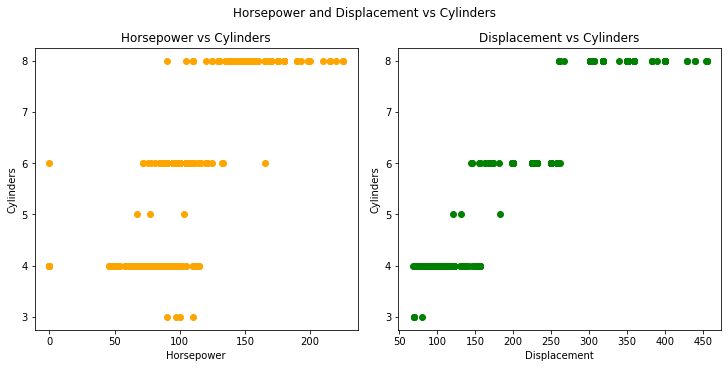

In [7]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize = (10,5), constrained_layout = True)
fig.suptitle('Horsepower and Displacement vs Cylinders')

# Horsepower v.s Cylinders
plt1.scatter(data.Horsepower, data.Cylinders, c = 'orange')
plt1.set_xlabel('Horsepower', fontsize = 10)
plt1.set_ylabel('Cylinders', fontsize = 10)
plt1.title.set_text('Horsepower vs Cylinders')

#Displacement v.s Cylinders
plt2.scatter(data.Displacement, data.Cylinders, c = 'green')
plt2.set_xlabel('Displacement', fontsize = 10)
plt2.set_ylabel('Cylinders', fontsize = 10)
plt2.title.set_text('Displacement vs Cylinders')

plt.show()

## 2.2.3.2 Plot a grouped bar chart for Displacement, Acceleration, MPG, and Horsepower grouped by Cylinders

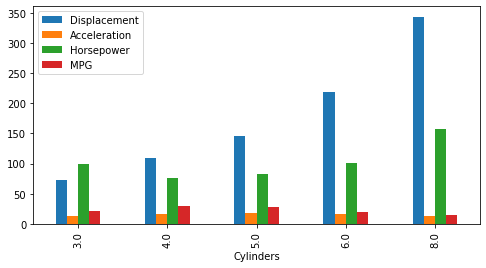

In [8]:
data[['Displacement', 'Acceleration', 'Horsepower', 'MPG', 'Cylinders']].groupby('Cylinders').mean().plot(kind = 'bar', figsize = (8,4))
plt.xlabel("Cylinders", fontsize = 10)

plt.show()

## 2.2.3.3 What can you find from above two charts to better impute the different feature missing values? Do you have any solutions for each of them and why? Please briefly explain in the code notebook.

From the above two charts, we find that there are missing values in the horsepower section. Those values appear to primarily be where there are 4 and 6 cylinder vehicles. From the bar chart, it is observed that there is not a large difference in horsepower between 4 and 6 cylinder vehicles. Likewise, from the scatter plots, we can see that there is a consistent range of values for both horsepower and displacement in relation to cylinders. Therefore, to impute the missing values, a median will work well. 

## 2.2.4 Impute all the missing values with median

In [9]:
data = data.fillna(data.median())

## 2.3.1 Draw boxplots in one figure to identify the features/columns that contain outliers

<AxesSubplot:>

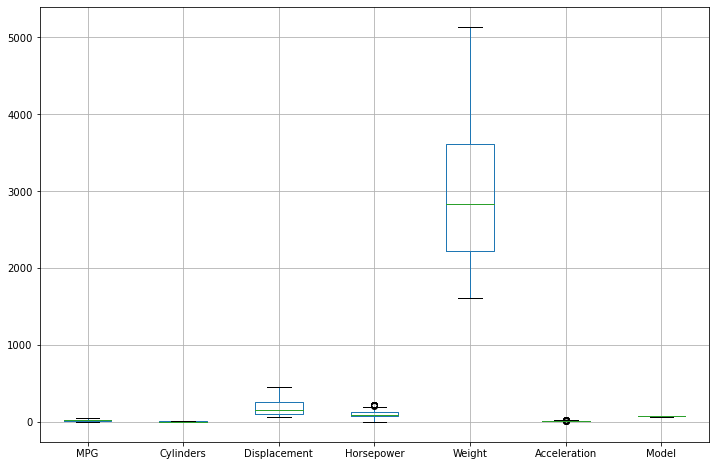

In [10]:
data.boxplot(figsize = (12,8))

## 2.3.2 Draw boxplots in one figure only containing outliers.

<AxesSubplot:>

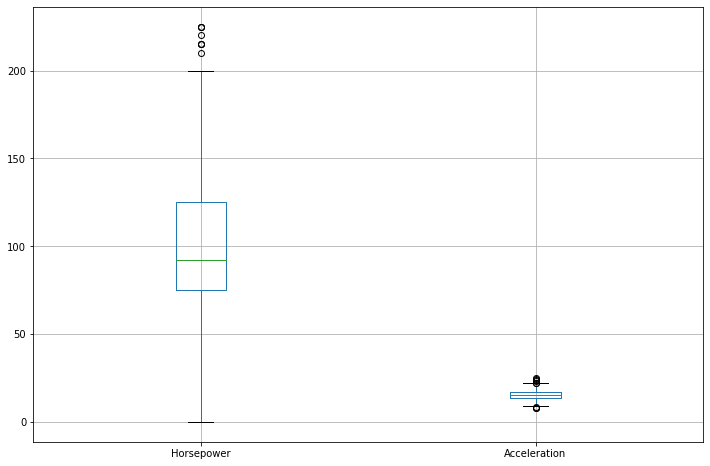

In [11]:
outlier_cols = []
for colName in data.columns:
    if data[colName].dtype == 'float64':
        Q1 = np.percentile(data[colName], 25)
        Q3 = np.percentile(data[colName], 75)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5*IQR
        upper_range = Q3 + 1.5*IQR
        upper = data[colName] >= upper_range
        lower = data[colName] <= lower_range
        if upper.any() or lower.any():
            outlier_cols.append(colName)

data[outlier_cols].boxplot(figsize = (12,8))

## 2.3.3 Come up with one approach to discard outliers and implement it.

In [12]:
for colName in data.columns:
    if data[colName].dtype == 'float64':
        Q1 = np.percentile(data[colName], 25)
        Q3 = np.percentile(data[colName], 75)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5*IQR
        upper_range = Q3 + 1.5*IQR
        upper = data[colName] >= upper_range
        data = data[upper == False]
        lower = data[colName] <= lower_range
        data = data[lower == False]

data

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US
...,...,...,...,...,...,...,...,...,...
399,Chevrolet Camaro,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,US
400,Ford Mustang GL,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,US
402,Dodge Rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,US
403,Ford Ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,US


## 2.4.1 Draw multiple histograms for all numerical attributes. What can you find? Please clearly explain in the notebook.

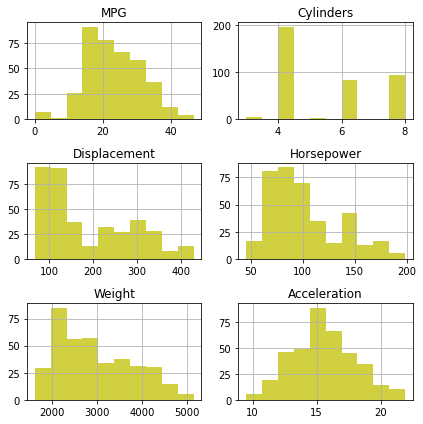

In [13]:
data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']].hist(figsize=(6, 6), bins=10, alpha = 0.75, color = 'y')
plt.tight_layout()
plt.show()

From the histograms, we find that most cars have an MPG right around 20; primarily only have 3 possible values for Cylinders (4, 6, or 8); generally either have a displacement between 100 - 200 or 300 - 400; mostly have horsepower between 75-100; can weigh a wide range from 2000 - 5000; and have a almost perfectly normal distribution for acceleration with the most common value being 15. 

## 2.4.2 Calculate and draw a correlation matrix. What can you find? Please explain in the notebook

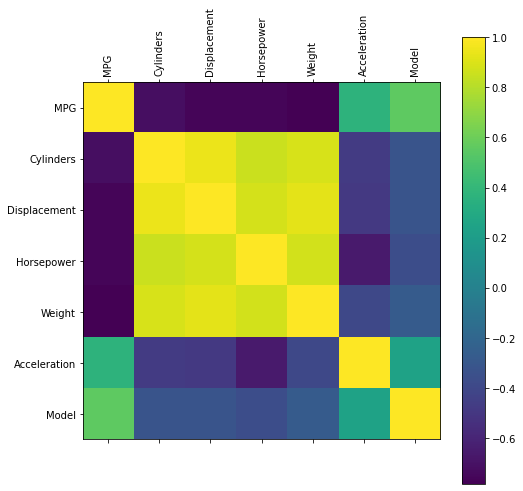

In [14]:
#Calculate the matrix
df = data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']]
data_corr = df.corr()

#Plot the matrix
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(data_corr)

plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)

plt.colorbar()

plt.show()

From the correlation matrix, we see that there is a strong positive correlation between cylinders, displacement, horsepower, and weight. Additionally, there is a negative correlation between MPG and Acceleration with those above categories. These correlations are significant. 

## 2.4.3 Draw a scatter matrix. What can you find? Please clearly explain in the notebook.

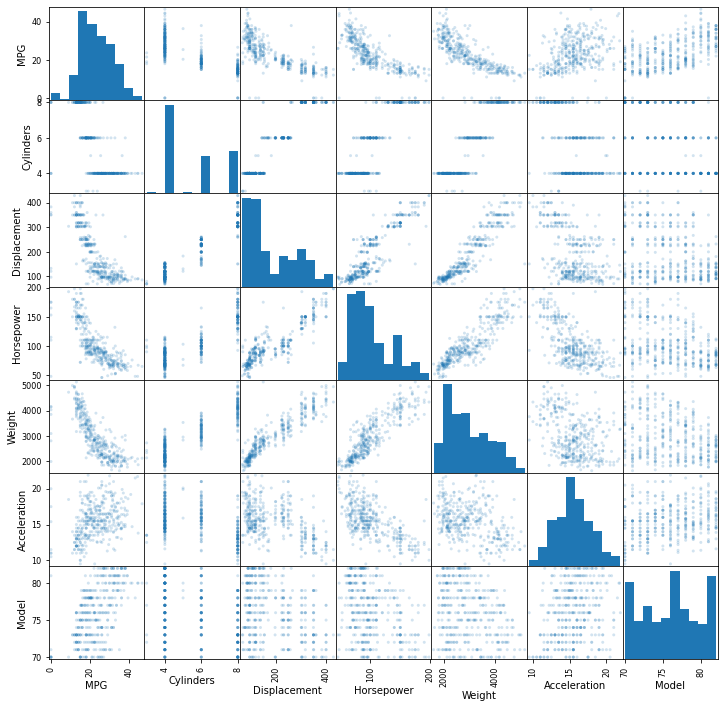

In [15]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.2, figsize = (12, 12))

The scatter matrix visually shows the positive correlation between weight, displacement, and horsepower. Likewise, it strongly shows the curve in the negative correlation between MPG with weight, horsepower, and displacement as well as the slightly weaker negative correlation between acceleration with displacement and horsepower. With regards to the MPG and model, it shows the tight spread where most vehicles are around 20. 